In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_body_parts(image_path):
 
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    head_lower = np.array([113, 9, 40]) 
    head_upper = np.array([170, 14, 20])  
    
    flippers_lower = np.array([20, 30, 40]) 
    flippers_upper = np.array([ 45, 140,  180])  
    
    carapace_lower = np.array([20, 50, 30])  
    carapace_upper = np.array([40, 180, 150])  

    # Segment each part using inRange to create masks
    head_mask = cv2.inRange(hsv, head_lower, head_upper)
    flippers_mask = cv2.inRange(hsv, flippers_lower, flippers_upper)
    carapace_mask = cv2.inRange(hsv, carapace_lower, carapace_upper)

    # Apply morphological operations to clean up the masks
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    head_mask = cv2.morphologyEx(head_mask, cv2.MORPH_CLOSE, kernel)
    flippers_mask = cv2.morphologyEx(flippers_mask, cv2.MORPH_CLOSE, kernel)
    carapace_mask = cv2.morphologyEx(carapace_mask, cv2.MORPH_CLOSE, kernel)

    # Find contours for each body part
    def extract_contours(mask):
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        return contours

    head_contours = extract_contours(head_mask)
    flippers_contours = extract_contours(flippers_mask)
    carapace_contours = extract_contours(carapace_mask)

    # Draw the contours on the original image for visualization
    result_image = image.copy()
    cv2.drawContours(result_image, head_contours, -1, (255, 0, 0), 2)  # Blue for head
    cv2.drawContours(result_image, flippers_contours, -1, (0, 255, 0), 2)  # Green for flippers
    cv2.drawContours(result_image, carapace_contours, -1, (0, 0, 255), 2)  # Red for carapace

    # Display the results
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(2, 2, 2)
    plt.title("Head Mask")
    plt.imshow(head_mask, cmap="gray")
    plt.subplot(2, 2, 3)
    plt.title("Flippers Mask")
    plt.imshow(flippers_mask, cmap="gray")
    plt.subplot(2, 2, 4)
    plt.title("Carapace Mask")
    plt.imshow(carapace_mask, cmap="gray")
    plt.figure()
    plt.title("Segmented Parts on Original Image")
    plt.imshow(result_image)
    plt.show()





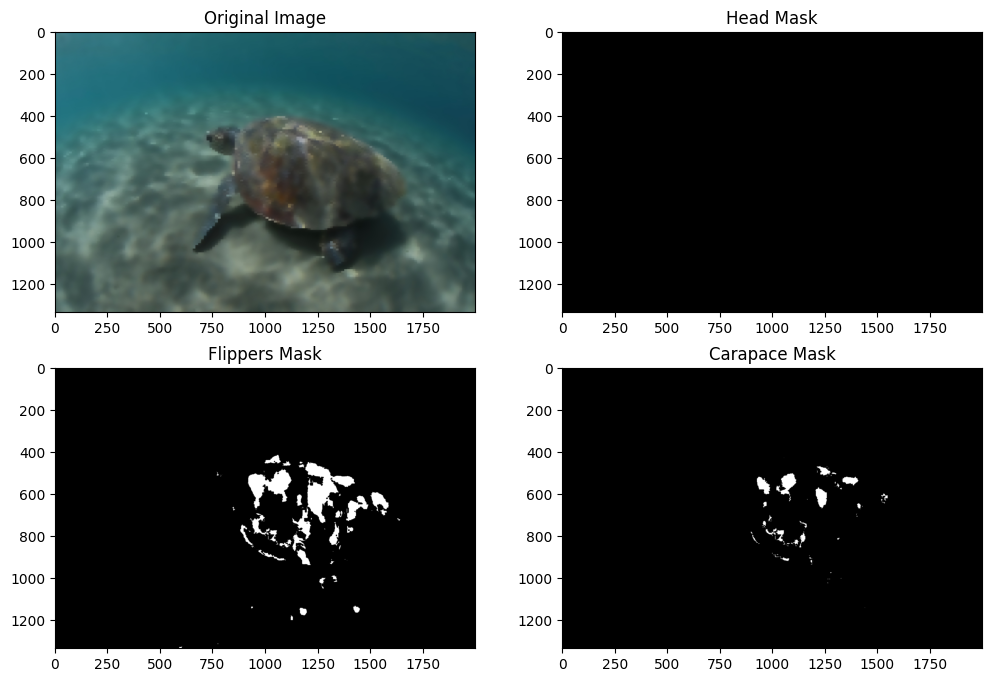

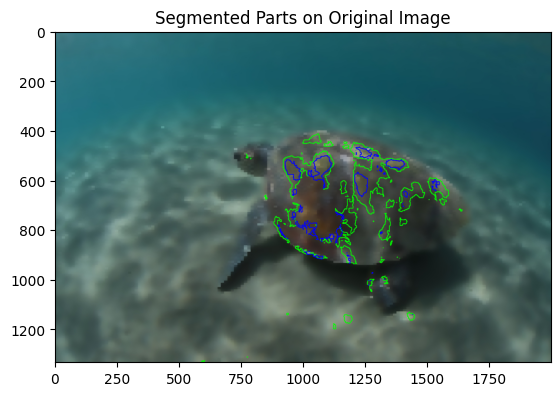

In [7]:
segment_body_parts("results/processed_image.jpg")

In [1]:
import cv2

# Function to flatten image
def flatten_image(image_path, small_size=(200, 200)):
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize to a small size (e.g., 10x10) to reduce detail
    small_image = cv2.resize(image, small_size, interpolation=cv2.INTER_LINEAR)
    
    # Scale it back up to the original size to see the blocky version
    flat_image = cv2.resize(small_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    return flat_image

# Example usage
image_path = 'turtles-data/data/images/t553/GhVLSdjicv.jpeg'
basic_image = flatten_image(image_path)


In [13]:
import cv2

# Function to flatten and smooth the image
def flatten_and_blur_image(image_path, small_size=(150, 150), blur_type='gaussian'):
    # Load the image
    image = cv2.imread(image_path)
    
    # Step 1: Resize to a small size (e.g., 10x10) to reduce detail
    small_image = cv2.resize(image, small_size, interpolation=cv2.INTER_LINEAR)
    
    # Step 2: Scale it back up to the original size to get a blocky version
    flat_image = cv2.resize(small_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    # Step 3: Apply smoothing to reduce color variations
    if blur_type == 'gaussian':
        # Gaussian Blur
        smoothed_image = cv2.GaussianBlur(flat_image, (11, 11), 0)
    elif blur_type == 'bilateral':
        # Bilateral Filter (preserves edges while smoothing)
        smoothed_image = cv2.bilateralFilter(flat_image, d=40, sigmaColor=100, sigmaSpace=20)
    else:
        raise ValueError("Invalid blur type. Choose 'gaussian' or 'bilateral'.")
    
    return smoothed_image

# Example usage
image_path = 'results/gray_image.png'
blurred_image = flatten_and_blur_image(image_path, blur_type='bilateral')

output_path = 'results/processed_image.jpg'  # Specify your desired file path and name

# Save the processed image
cv2.imwrite(output_path, blurred_image)

# Display the result
cv2.imshow("Flattened and Blurred Image", blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-10-30 18:36:06.386 Python[37794:2144415] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [2]:

import cv2
import numpy as np

# Load the image
image_path = 'turtles-data/data/images/t014/adKWkwDUip.jpeg'
image = cv2.imread(image_path)

# Convert to RGB for color quantization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image_rgb.reshape(-1, 3)  # Flatten the image pixels

# Number of colors/clusters (choose a number like 5 or 10)
num_clusters = 10

# Apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(
    np.float32(pixels), num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
)

# Map each pixel to the nearest color cluster
quantized_image = centers[labels.flatten()]
quantized_image = quantized_image.reshape(image_rgb.shape).astype(np.uint8)

# Convert back to BGR (or HSV if you prefer)
quantized_image_bgr = cv2.cvtColor(quantized_image, cv2.COLOR_RGB2BGR)

# Display or save the quantized image
cv2.imwrite('results/quantized_image.jpg', quantized_image_bgr)
print("Quantized image saved as 'quantized_image.png'")

Quantized image saved as 'quantized_image.png'


In [1]:
import cv2

# Load the color image
image_path = 'turtles-data/data/images/t014/adKWkwDUip.jpeg'
color_image = cv2.imread(image_path)

# Convert the color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save or display the grayscale image
cv2.imwrite('results/gray_image.png', gray_image)

True